# GRIP @ The Sparks Foundation

## Task 1: Prediction using supervied machine learning [Linear Regression]

## Author: Piyush Kumar

In [6]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Fetching data from url

In [104]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Plotting correlation between "Hours" and "Scores"

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


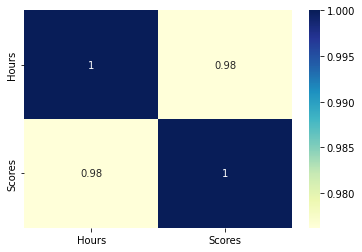

In [11]:
corr_plot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

We can see that "Hours" and "Scores" are highly positively correlated. So, If "Hours" increases the "Score" is also expected to increase.

## Visualising using scatter plot

Text(0, 0.5, 'Scores')

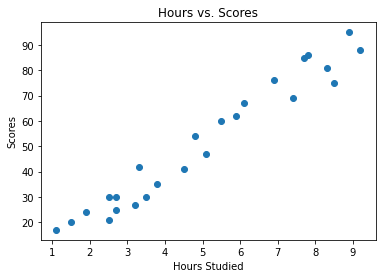

In [14]:
plt.scatter(data["Hours"], data["Scores"])
plt.title("Hours vs. Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")

We can see the scores are increasing with the number of hours put into studying

## Preparing data 

In [102]:
X = data.iloc[:, 0:1].values # Feature
y = data.iloc[:, 1].values # Label

## Splitting data into training and testing data



In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
X_train.shape

(20, 1)

In [82]:
X_test.shape


(5, 1)

## Model Creation

In [83]:
# Model Creation
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [84]:
regressor.coef_

array([9.83791385])

In [85]:
regressor.intercept_

2.5366112399467085

## Plotting regression line

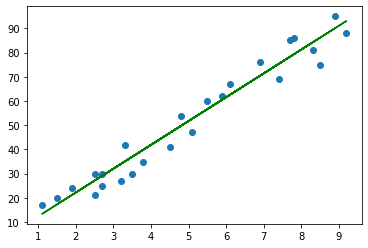

In [109]:
line = regressor.coef_*X + regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line, color='green')

## Predicting on data we saved for testing

In [92]:
preds = regressor.predict(X_test)
preds

array([52.70997188, 13.35831648, 29.09897864, 27.13139587, 46.80722357])

In [95]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': preds})  
df 

,Actual,Predicted
0,47,52.709972
1,17,13.358316
2,25,29.098979
3,30,27.131396
4,41,46.807224


<AxesSubplot:>

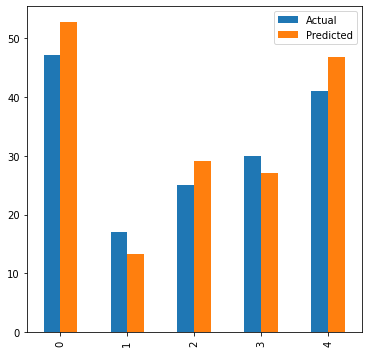

In [107]:
df.plot(kind='bar', figsize=(6,6))

## Prediction on new data

In [100]:
new_pred = regressor.predict([[9.25]])
print("No of Hours studied = 9.25")
print("Predicted Score = {}".format(new_pred[0]))

No of Hours studied = 9.25
Predicted Score = 93.53731435338234


## Scoring model

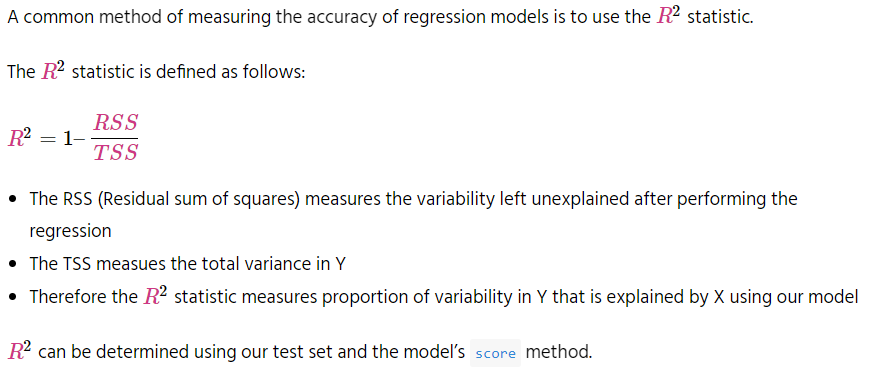

In [108]:
regressor.score(X_test, y_test)

0.8208561664603612

So in our model, 82.08% of the variation in Y can be explained using X or 82.08% of the variations are explained by the relation between the number of hours studying and the scores. 

## Evaluating model

We have chosen the mean square error.

In [101]:
from sklearn.metrics import mean_absolute_error  

print('Mean Absolute Error:', mean_absolute_error(y_test, preds)) 

Mean Absolute Error: 4.425292347165341
